<a href="https://colab.research.google.com/github/mariammur/CS4410/blob/main/Hw_7_(16_4)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")



((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

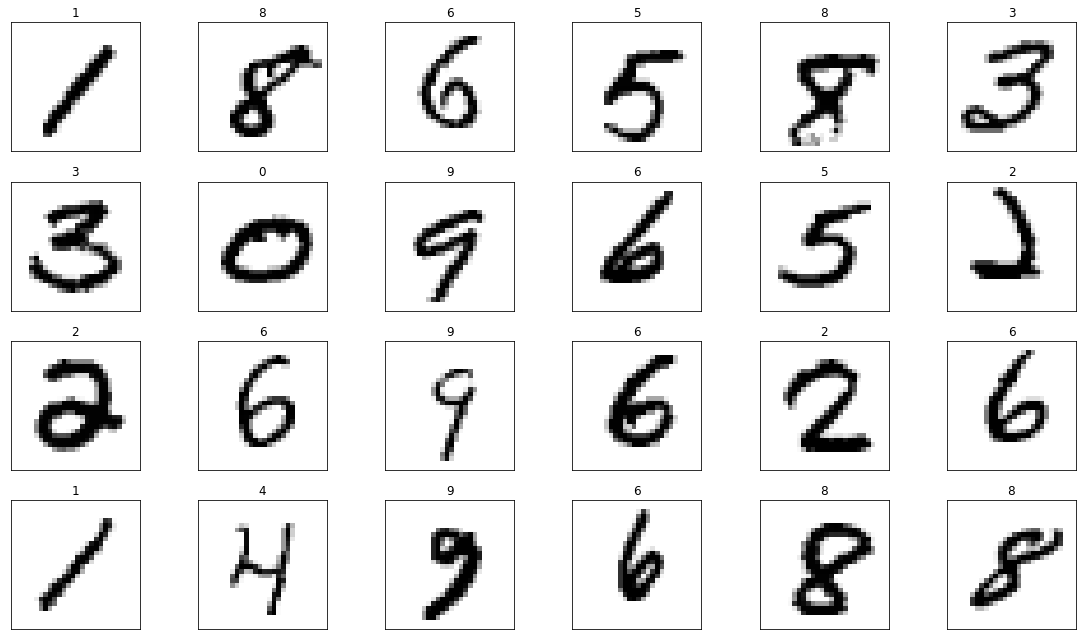

In [4]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [5]:
X_train = X_train.astype('float32') / 255


In [6]:
X_test = X_test.astype('float32') / 255

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [10]:
from tensorflow.keras.models import Sequential 
cnn = Sequential()

In [11]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 


In [12]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))


In [13]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))


In [14]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [16]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

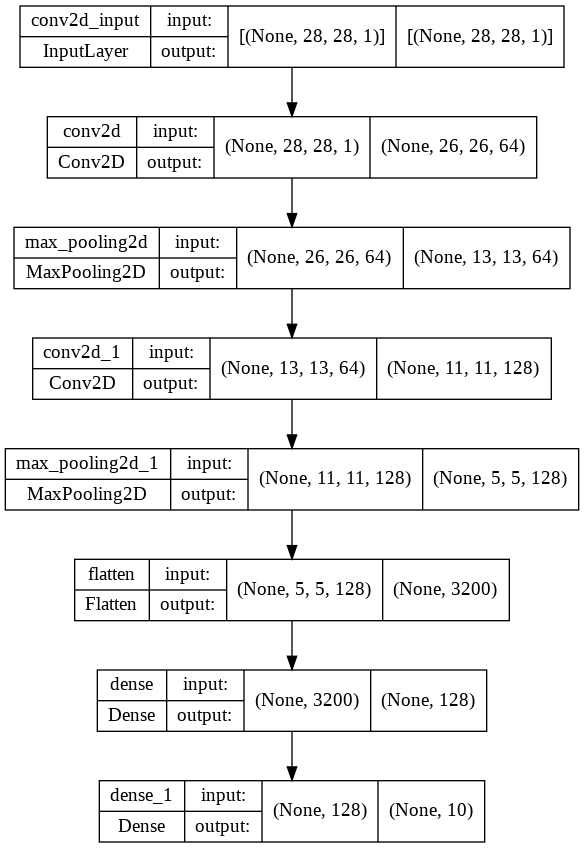

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')  

In [18]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 124s 146ms/step - loss: 0.1413 - accuracy: 0.9573 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 2/5
844/844 [==============================] - 119s 141ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 117s 138ms/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 4/5
844/844 [==============================] - 117s 138ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0413 - val_accuracy: 0.9882
Epoch 5/5
844/844 [==============================] - 117s 139ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0343 - val_accuracy: 0.9903


In [20]:
loss, accuracy = cnn.evaluate(X_test, y_test)


313/313 [==============================] - 6s 20ms/step - loss: 0.0277 - accuracy: 0.9911


In [21]:
loss


0.027681583538651466

In [22]:
accuracy


0.991100013256073

In [23]:
predictions = cnn.predict(X_test)


In [24]:
y_test[0]


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [25]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000081%
1: 0.0000000212%
2: 0.0000002577%
3: 0.0000002148%
4: 0.0000000001%
5: 0.0000002939%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000959%
9: 0.0000009430%


In [26]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []


In [27]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

89

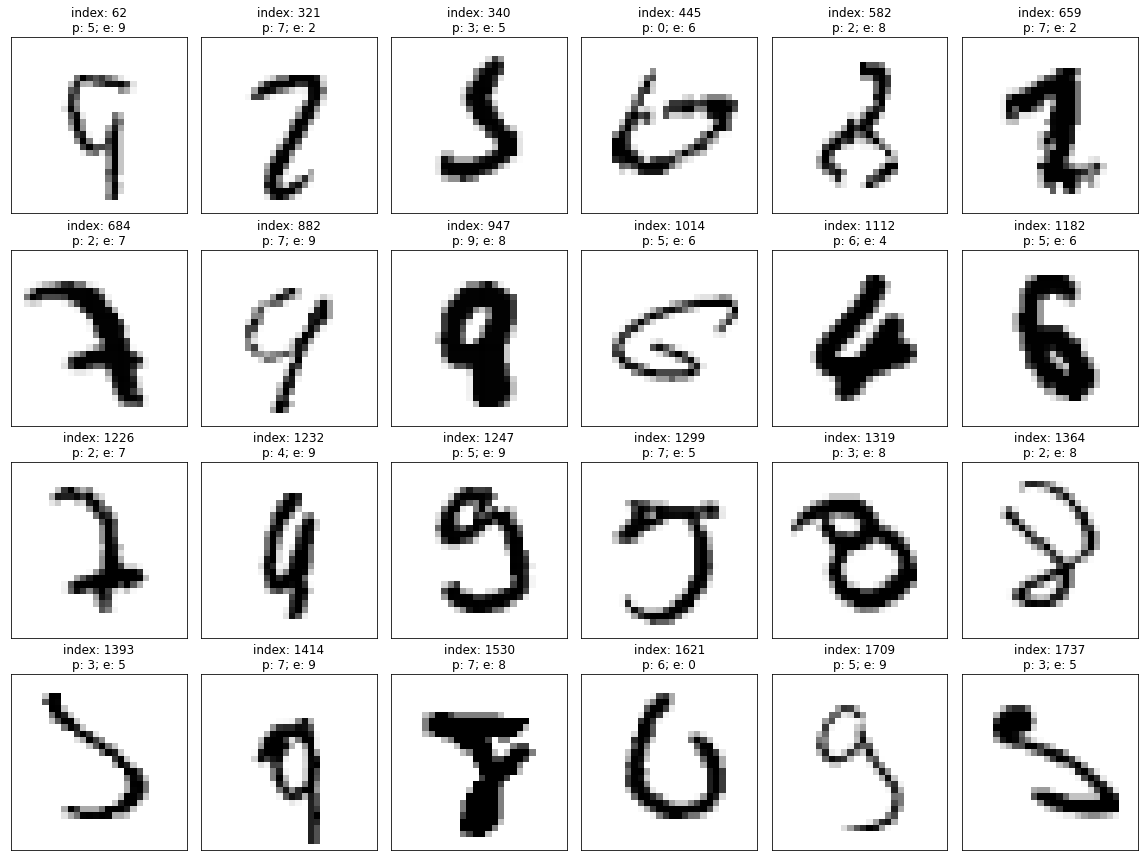

In [28]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [29]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [30]:
display_probabilities(predictions[340])


0: 0.0000019237%
1: 0.0019146122%
2: 0.0000735982%
3: 78.0477106571%
4: 0.0000203154%
5: 21.9418674707%
6: 0.0067467852%
7: 0.0000003930%
8: 0.0015966823%
9: 0.0000733218%


In [31]:
display_probabilities(predictions[740])


0: 0.0000009902%
1: 0.0146529695%
2: 0.0746492587%
3: 0.0099889890%
4: 78.4299790859%
5: 0.0022441011%
6: 0.0000000030%
7: 3.9147470146%
8: 0.0070608621%
9: 17.5466775894%


In [32]:
display_probabilities(predictions[1260])


0: 0.0042506028%
1: 29.5590788126%
2: 0.5751816556%
3: 0.0140714532%
4: 0.0180391435%
5: 0.0010758344%
6: 0.0000017094%
7: 69.7186291218%
8: 0.0489548722%
9: 0.0607148628%


In [33]:
cnn.save('mnist_cnn.h5')


In [34]:
cnn.add(Dense(units=128, activation='relu'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [35]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [38]:
predictions = cnn.predict(X_test)


In [39]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [40]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 13.3387044072%
2: 0.0000000000%
3: 7.3458269238%
4: 20.5583289266%
5: 15.3762564063%
6: 10.5646654963%
7: 0.0000000000%
8: 0.0000000000%
9: 6.6145136952%
10: 0.0000000000%
11: 0.0262141111%
12: 12.2556075454%
13: 15.5725106597%
14: 0.0000000000%
15: 0.0000000000%
16: 7.5495049357%
17: 19.6090444922%
18: 11.0733762383%
19: 0.0000000000%
20: 10.1472452283%
21: 0.0000000000%
22: 16.9489547610%
23: 0.0000000000%
24: 0.0000000000%
25: 0.0000000000%
26: 0.0000000000%
27: 0.0000000000%
28: 0.0000000000%
29: 3.1498759985%
30: 6.1902359128%
31: 0.0000000000%
32: 13.0835548043%
33: 0.0000000000%
34: 0.0000000000%
35: 0.0000000000%
36: 0.0000000000%
37: 0.0000000000%
38: 15.9332737327%
39: 1.5535830520%
40: 0.0000000000%
41: 11.9538560510%
42: 7.1300193667%
43: 0.0000000000%
44: 15.5147895217%
45: 0.0000000000%
46: 13.0813375115%
47: 18.5861214995%
48: 1.5156077221%
49: 0.0000000000%
50: 0.0000000000%
51: 19.6228697896%
52: 16.3182720542%
53: 0.0000000000%
54: 0.0000000000%
55

In [41]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

10000

In [42]:
cnn.pop() 

In [43]:
cnn.pop() 

In [44]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [45]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [47]:
predictions = cnn.predict(X_test)


In [48]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 582.6201438904%
1: 0.0000000000%
2: 0.0000000000%
3: 550.6273746490%
4: 117.6896691322%
5: 0.0000000000%
6: 128.9675354958%
7: 0.0000000000%
8: 0.0000000000%
9: 0.0000000000%
10: 0.0000000000%
11: 0.0000000000%
12: 0.0000000000%
13: 0.0000000000%
14: 0.0000000000%
15: 96.4179754257%
16: 584.8252296448%
17: 673.4026908875%
18: 0.0000000000%
19: 0.0000000000%
20: 891.0318374634%
21: 0.0000000000%
22: 97.5337803364%
23: 0.0000000000%
24: 0.0000000000%
25: 467.6223754883%
26: 0.0000000000%
27: 0.0000000000%
28: 0.0000000000%
29: 496.8074321747%
30: 0.0000000000%
31: 581.5757274628%
32: 0.0000000000%
33: 389.5402193069%
34: 88.1126999855%
35: 0.0000000000%
36: 417.5701618195%
37: 0.0000000000%
38: 0.0000000000%
39: 0.0000000000%
40: 0.0000000000%
41: 0.0000000000%
42: 0.0000000000%
43: 0.0000000000%
44: 513.6754989624%
45: 860.2800369263%
46: 207.0073604584%
47: 0.0000000000%
48: 0.0000000000%
49: 0.0000000000%
50: 0.0000000000%
51: 0.0000000000%
52: 479.0994644165%
53: 357.8570604324%
5

In [50]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

9985